In [1]:
import re # This module provides regular expression matching operations similar to those found in Perl.
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
import string # String module contains some constants, utility function, and classes for string manipulation.
from nltk.corpus import stopwords # Predefined list of common words
import nltk 
from nltk.corpus import wordnet # WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms.
from nltk.stem import WordNetLemmatizer # 基於 WordNet 的詞形還原工具 class
from nltk.tokenize.treebank import TreebankWordDetokenizer # Detokenizer: 將已分詞的文本重新組合成完整句子 
from collections import Counter # 計數class
from wordcloud import WordCloud # 生成文字雲class
from gensim.utils import simple_preprocess # function, 返回一個已分詞的小寫單詞 list。
import gensim # gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.
from sklearn.model_selection import train_test_split
import spacy # spaCy is a free open-source library for Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more. 其他 NLP 庫 (如 NLTK) 不同，spaCy 主要關注高效的處理管道，以便能夠快速地處理大量文本。
import pickle # Data -(Serialization)->  Medium(Binary) -(Deserialization)-> Data
import warnings # Python standard library的一部分，用來控制程序中的警告訊息。
import seaborn as sns # 繪圖函式庫，以matplotlib為基礎封裝了許多實用的統計圖表，相較於matplotlib，seaborn的預設圖形更為好看，語法更為簡潔，並且良好的支援了pandas函式庫。
from sklearn.metrics import confusion_matrix # scikit-learn library -> metrics module -> confusion_matrix function 生成混淆矩陣
import tensorflow as tf # 開源的深度學習框架，用於構建和訓練神經網路。它提供了豐富的 API 來處理大規模的機器學習模型和神經網路的訓練與部署。
import keras # 神經網路 API，最初作為獨立庫開發，後來被整合進 tensorflow。它提供了簡潔的接口來快速構建和訓練深度學習模型，
import numpy as np # 數值計算庫，供了一個高效的多維數組 ndarray
import pandas as pd # 數據處理庫，它提供了兩種核心數據結構：DataFrame 和 Series。

warnings.filterwarnings('ignore') # 忽略所有警告訊息。

In [2]:
data = pd.read_csv(r'C:\Users\user\Desktop\Python\Thesis\NLP_old\1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sentence     26 non-null     object 
 1   label        26 non-null     int64  
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed: 1

In [3]:
findata = data.dropna(axis=1)
findata.info()
findata.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  26 non-null     object
 1   label     26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 548.0+ bytes


,sentence,label
0,$2.26 Billion Growth in Global Smart Waste Man...,2
1,"NEW YORK, March 25, 2021 /PRNewswire/ -- Techn...",0
2,The market is segmented by application (collec...,0
3,The report offers an in-depth analysis of rece...,0
4,Download Sample Report Instantly,0


In [4]:
findata['label'].unique() # Return unique value of a Series object as a Numpy array.

array([2, 0, 1], dtype=int64)

In [5]:
findata.groupby('label').nunique() # nunique(): retrun dataframe with counts of unique elements. (number of unique values)

,sentence
label,
0,18
1,1
2,6


In [6]:
findata['label'].isnull().sum() # if the element in label col is null, return True, and sum then from each row.

0

### Regular expression 特殊字符 (Metacharacters)
1. `.`： 任意字符，`a.b` -> "acb"、"a-b"、"a9b"等

2. `^`： 字符串開頭，`^a` -> "apple"等

3. `$`： 字符串結尾，`a$` -> "banana"等 

4. `*`： 字符可有可無，並且可以出現多次，`ab*` -> "a"、"ab"、"abb"、"abbb"等

5. `+`： 字符至少出現一次，`ab+` -> "ab"、"abb"、"abbb"等

6. `?`： 字符出現零或一次，`ab?` -> "a" 或 "ab"

7. `[]`： 字符集，匹配其中任意字符，`[a-z]` -> 匹配小寫字母範圍內的任意一個字符

8. `\`： 有些字符在正則表達式中有特殊含義(. * 等)，想匹配這些符號本身，需要使用 \ 進行轉義，`\.` -> 匹配字面上的點號 "."

9. `|`： 匹配兩邊的任意一個模式，`a|b` -> 匹配 "a" 或 "b"

10. `()`： 用來分組，後續可對組合進行操作，`(ab)+` ->  "ab"、"abab"等

11. `\S`： 比對任一個非空白字元

12. `\s`： 比對任一個空白字元

In [8]:
import re
#Remove URLs from sentences
#Tokenize text
#Remove emails
#Remove new lines characters
#Remove distracting single quotes
def depure_data(data):

    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+') # Compile a ragular expression pattern, return a "Pattern object".
    # https?： 匹配 http 或 https，\S+： 匹配一個或多個「非空白字符」 

    data = url_pattern.sub(r'', data) # 使用 Pattern object 的 sub()，將匹配到的文本替換成""
    
    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)
    # \S*: 非空白，可有可無
    # @
    # \s?: 任何空白字符，如空格、換行符，零或一


    # Remove new line characters
    data = re.sub('\s+', '', data) # 移除多餘的空白字符，轉成""


    # Remove distracting single quotes
    data = re.sub("\'", "", data) # 移除單引號

    return data

### Test
Test: re func

In [9]:
URL_test = "Check this out: https://www.youtube.com/ is good!"
Email_test = "Please contact me at 1128benbenben@gmail.com for more details."
Space_test = "This   is  a   test\nwith multiple    spaces\nand new lines."
Quote_test = "It's a wonderful day! Let's make the best of it."
Combined_test = "Contact me at hxiang1128@gmail.com\n Visit http://example.com for more info! It's   a   great day."

test_list = [URL_test, Email_test, Space_test, Quote_test, Combined_test]
for idx, test in enumerate(test_list):
    print(f"{idx}: {test} -> {depure_data(test)}")

0: Check this out: https://www.youtube.com/ is good! -> Check this out: is good!
1: Please contact me at 1128benbenben@gmail.com for more details. -> Please contact me at for more details.
2: This   is  a   test
with multiple    spaces
and new lines. -> This is a test with multiple spaces and new lines.
3: It's a wonderful day! Let's make the best of it. -> Its a wonderful day! Lets make the best of it.
4: Contact me at hxiang1128@gmail.com
 Visit http://example.com for more info! It's   a   great day. -> Contact me at Visit for more info! Its a great day.


In [10]:
temp = []
#Splitting pd.Series to list
data_to_list = findata['sentence'].values.tolist() # .value: 轉換成numpy數組
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i])) # 移除 URLs、Emails、多餘的空白字符、單引號
list(temp[:5]) # index 0~4

['$2.26 Billion Growth in Global Smart Waste Management Market During 2021-2025 | Featuring Key Vendors Including Bigbelly Inc., Compology, and Contelligent | Technavio',
 'NEW YORK, March 25, 2021 /PRNewswire/ -- Technavio announces the release of its latest report on the smart waste management market.',
 'The market is segmented by application (collection, landfill, recovery and recycling, and processing) and geography (Europe, APAC, North America, South America, and MEA).',
 'The report offers an in-depth analysis of recent developments, changes in market regulations, product approvals, product launches, and the market behavior across various segments.',
 'Download Sample Report Instantly']

### `gensim.utils.simple_preprocess()`: 將句子轉換成一個單詞列表。
1. 將句子轉換為小寫。
2. 去掉標點符號 (當deacc=True時)。
3. 移除太短的詞 (預設會去掉少於兩個字母的詞)。
4. return 詞語列表


In [11]:
#Remove all punctuation signs
def sent_to_words(sentences):
    i = 0  
    for sentence in sentences:
        if i < 2:
            print(f"Before: {sentence}")
        i += 1
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

temp_gen = sent_to_words(temp)
data_words = list(temp_gen) #  generator -> list

print(f"======================\nWhat is sent_to_words(temp): {temp_gen}") # generator object
print(f"======================\nAfter: {data_words[:2]}") # index 0, 1 

Before: $2.26 Billion Growth in Global Smart Waste Management Market During 2021-2025 | Featuring Key Vendors Including Bigbelly Inc., Compology, and Contelligent | Technavio
Before: NEW YORK, March 25, 2021 /PRNewswire/ -- Technavio announces the release of its latest report on the smart waste management market.
What is sent_to_words(temp): <generator object sent_to_words at 0x0000019AC96ADA80>
After: [['billion', 'growth', 'in', 'global', 'smart', 'waste', 'management', 'market', 'during', 'featuring', 'key', 'vendors', 'including', 'bigbelly', 'inc', 'compology', 'and', 'contelligent', 'technavio'], ['new', 'york', 'march', 'prnewswire', 'technavio', 'announces', 'the', 'release', 'of', 'its', 'latest', 'report', 'on', 'the', 'smart', 'waste', 'management', 'market']]


In [12]:
print(len(data_words))

26


### `TreebankWordDetokenizer()`
來自 nltk.tokenize.treebank 模組的工具，專門用來將標記化後的詞語重新組合成完整的句子。它會正確處理空格與標點符號，確保生成的句子符合語法規則。

In [13]:
def detokenize(text):
    detokenizer = TreebankWordDetokenizer()
    return detokenizer.detokenize(text)

In [14]:
#Detokenize text
data1 = []
counter = 0
for i in range(len(data_words)):
    data1.append(detokenize(data_words[i]))
    if counter < 2:
        print(f"Before: {data_words[i]}\nAfter: {data1[i]}\n")
        counter += 1

print(data1[:2])

Before: ['billion', 'growth', 'in', 'global', 'smart', 'waste', 'management', 'market', 'during', 'featuring', 'key', 'vendors', 'including', 'bigbelly', 'inc', 'compology', 'and', 'contelligent', 'technavio']
After: billion growth in global smart waste management market during featuring key vendors including bigbelly inc compology and contelligent technavio

Before: ['new', 'york', 'march', 'prnewswire', 'technavio', 'announces', 'the', 'release', 'of', 'its', 'latest', 'report', 'on', 'the', 'smart', 'waste', 'management', 'market']
After: new york march prnewswire technavio announces the release of its latest report on the smart waste management market

['billion growth in global smart waste management market during featuring key vendors including bigbelly inc compology and contelligent technavio', 'new york march prnewswire technavio announces the release of its latest report on the smart waste management market']


In [15]:
# Convert list of texts to Numpy array
data = np.array(data1)
print(f"Before: {type(data1)}")
print(f"After: {type(data)}")

Before: <class 'list'>
After: <class 'numpy.ndarray'>


### `tf.keras.utils.to_categorical()`
將整數類別標籤轉換為 one-hot encoding

In [16]:
labels = np.array(findata['label'])
print(f"Before: {type(findata['label'])}\nAfter: {labels}\n")

y1 = []  
for i in range(len(labels)):
    if labels[i] == 0:
        y1.append(0)
    if labels[i] == 1:
        y1.append(1)
    if labels[i] == 2:
        y1.append(2)

y = np.array(y1)
print(f"Before: {type(y1)}")
print(f"After: {type(y)}\n")

labels = tf.keras.utils.to_categorical(y, 3, dtype="float32") # (data, num_classes, dtype)
print(labels)
del y, y1 # deletes variable releases memory.

Before: <class 'pandas.core.series.Series'>
After: [2 0 0 0 0 0 0 2 1 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0]

Before: <class 'list'>
After: <class 'numpy.ndarray'>

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### A more pythonic way..

In [17]:
labels = np.array(findata['label'])
labels_one_hot = tf.keras.utils.to_categorical(labels, 3) # default float32
print(f"From the pandas type: {labels}\n to the same outcome:\n{labels_one_hot}")

From the pandas type: [2 0 0 0 0 0 0 2 1 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 to the same outcome:
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [18]:
print(len(labels))
print(len(labels_one_hot)) # what we need..

26
26


### `max_words`
`num_words`參數的作用是限制要考慮的詞彙表的大小，它設定了只考慮文本中出現頻率最高的5000個詞。

當使用`Tokenizer`時，會根據文本中詞語的出現頻率來排序，最常見的詞會被賦予較低的索引。`max_words`限制了最多只保留出現頻率最高的 5000 個詞。只考慮出現頻率較高的詞語，忽略掉不常見的詞，能夠減少訓練時間，並防止模型過於複雜。並且，少數次出現的詞可能帶有過多的噪音，通過忽略這些詞，可以減少過擬合的風險。

1. 假設文本中出現頻率最高的詞是 "the"，編號 1；
2. 第二常見的詞可能是 "is"，編號 2；
3. 第 5000 常見的詞可能是 "apple"，編號 5000；
4. 出現次數在 5000 之後的詞將被忽略。


### `max_len`
`maxlen`參數的作用是將所有文本的長度設置為 200，無論原始文本是多長或多短。在深度學習，輸入數據通常需要有一致的形狀。對於文本數據來說，不同的句子或段落可能有不同的長度，例如一個句子可能有10個詞，而另一個句子可能有300個詞。為了讓所有文本的長度一致，便於訓練，必須將它們填充(padding)或截斷(truncation)到一個固定的長度。

`max_len=10`
1. Before: [4, 3, 2] -> After:[0, 0, 0, 0, 0, 0, 0, 4, 3, 2] 填充開頭
2. Before: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2] -> After: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  保留前10

In [20]:
from keras.models import Sequential # 線性堆疊模型，Keras 用來構建神經網路模型的基礎結構
from keras import layers # Keras 中的神經網路層定義工具
from keras.optimizers import RMSprop,Adam # 優化器
from keras.preprocessing.text import Tokenizer # Keras 提供的文本處理工具，用來將文本轉換為數字序列。
from tensorflow.keras.preprocessing.sequence import pad_sequences # Keras 中用來填充序列的工具。因為神經網路需要一致的輸入長度，所以必須將不同長度的文本填充到固定長度。
from keras import regularizers # 防止過擬合，例如使用 L1 或 L2 正則化來約束權重值。
from keras import backend as K # Keras 的後端函數集合，用來進行數學操作。
from keras.callbacks import ModelCheckpoint # 用來在訓練過程中保存模型，每次模型在驗證集上表現變好時，ModelCheckpoint 會保存該模型的權重。

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
word_dic = tokenizer.fit_on_texts(data) # fit_on_texts(): 遍歷文本建立詞彙表，它不會return東西，只是用來更新 Tokenizer 內部的狀態。
print(f"fit_on_texts() is not gonna return a thing: {word_dic}\n")
print(f"But we can use tokenizer.word_index: {tokenizer.word_index}\n") 
sequences = tokenizer.texts_to_sequences(data) # texts_to_sequences(): 根據剛剛的詞彙表，將文本換成對應的數字
finsen = pad_sequences(sequences, maxlen=max_len) # padding or truncate
print(f"Change into num:\n {finsen}")

fit_on_texts() is not gonna return a thing: None

But we can use tokenizer.word_index: {'the': 1, 'and': 2, 'waste': 3, 'market': 4, 'management': 5, 'of': 6, 'in': 7, 'smart': 8, 'report': 9, 'global': 10, 'is': 11, 'america': 12, 'industrial': 13, 'growth': 14, 'its': 15, 'by': 16, 'offers': 17, 'sample': 18, 'for': 19, 'business': 20, 'free': 21, 'during': 22, 'vendors': 23, 'bigbelly': 24, 'inc': 25, 'technavio': 26, 'segmented': 27, 'recycling': 28, 'geography': 29, 'europe': 30, 'apac': 31, 'north': 32, 'an': 33, 'growing': 34, 'get': 35, 'operates': 36, 'through': 37, 'unified': 38, 'segment': 39, 'company': 40, 'key': 41, 'on': 42, 'application': 43, 'collection': 44, 'south': 45, 'mea': 46, 'regulations': 47, 'product': 48, 'across': 49, 'factors': 50, 'have': 51, 'to': 52, 'forecast': 53, 'period': 54, 'services': 55, 'it': 56, 'hauling': 57, 'other': 58, 'hazardous': 59, 'others': 60, 'exclusive': 61, 'nuclear': 62, 'billion': 63, 'featuring': 64, 'including': 65, 'compology

In [22]:
print(labels_one_hot)

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### `train_test_split()`
用來隨機劃分數據集，須提供data與label，預設75% 的數據作為訓練集，25% 的數據作為測試集。<br>
`test_size`可調整切割比例。


Model uses x_train data to learn the relationship between the input features and the output labels.<br>

Model makes predictions based on X_train and compares its predictions to y_train (the correct answers).<br>

Test set is used to evaluate the model's performance, meaning it tests how well the model can generalize to new, unseen data.<br>

During testing, the model's predictions on X_test are compared to y_test.


In [23]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(finsen, labels_one_hot, random_state=42) # control the random seed, ensure the training and test sets are split in the same way every time the code is run.
print (len(X_train),len(X_test),len(y_train),len(y_test))
print(f"\ntrain x:\n {X_train}")
print(f"\ntrain label:\n {y_train}")

19 7 19 7

train x:
 [[ 0  0  0 ...  3  5  4]
 [ 0  0  0 ... 21 18  9]
 [ 0  0  0 ...  4 41 90]
 ...
 [ 0  0  0 ...  1 38 39]
 [ 0  0  0 ...  1 38 39]
 [ 0  0  0 ...  4 14 91]]

train label:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

test x:
 [[  0   0   0 ...   6  13   3]
 [  0   0   0 ... 148   7 149]
 [  0   0   0 ...   2  67  26]
 ...
 [  0   0   0 ... 131 132  26]
 [  0   0   0 ...   3   5 113]
 [  0   0   0 ...  25  24  25]]

test label:
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [24]:
print(f"\ntest x:\n {X_test}")
print(f"\ntest label:\n {y_test}")


test x:
 [[  0   0   0 ...   6  13   3]
 [  0   0   0 ... 148   7 149]
 [  0   0   0 ...   2  67  26]
 ...
 [  0   0   0 ... 131 132  26]
 [  0   0   0 ...   3   5 113]
 [  0   0   0 ...  25  24  25]]

test label:
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


### `ModelCheckpoint`
`ModelCheckpoint`是 Keras 提供的一個 回調函數(callback)，它的主要作用是在訓練過程中保存模型。它會在每個訓練周期(epoch)結束後檢查模型的性能，根據設定的條件自動保存模型的權重或者整個模型。這樣做的目的是防止在長時間訓練中，由於某些原因（如過擬合或運行中斷）導致丟失了模型的最佳狀態。

回調函數（Callback）是 Keras 和其他深度學習框架中用來在訓練過程中插入一些自定義行為的工具。回調函數可以在訓練過程中的各個階段執行，比如在每個 epoch 開始或結束時、每個 batch 結束時、訓練開始或結束時執行一些特定的操作。這使得回調函數成為監控、修改或控制訓練流程的一種靈活手段。

### `model.fit()`
`model.fit()`是 Keras 用來訓練模型的函數。它會將訓練數據傳入模型，並進行反向傳播來優化模型的參數。

In [26]:
model = Sequential() #  順序模型，適合層與層之間有序連接的情況。
model.add(layers.Embedding(max_words, 50, input_length=max_len)) # Embedding 將離散的詞語表示為密集的向量。每個詞會被表示成一個 50 維的向量。
model.add(layers.Bidirectional(layers.LSTM(128,dropout=0.2))) # 雙向層包著(具有128個神經元的LSTM層，每次更新時以20%的概率隨機"關閉"LSTM的神經元，避免overfitting)
model.add(layers.Dense(3,activation='softmax')) # 全連接層，上層output=這層input，activation引入非線性，常用於產生最終output，3代表輸出類別數 
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # 編譯模型(配置模型的訓練過程)

checkpoint = ModelCheckpoint( # callback
    "best_model.hdf5",  
    monitor='val_accuracy',  # 決定希望監控的指標。驗證準確率有提升則保存。
    verbose=1, # 輸出信息詳略程度
    save_best_only=True, # 超過前一次時保存。
    mode='auto', # 如何判斷「最好」(準確率=max, loss=min)。
    period=1, # 控制模型是否檢查並保存的頻率。
    save_weights_only=False 
) 

history = model.fit( # model.fit() return 整個訓練過程中的損失值、準確率、驗證損失和驗證準確率等信息。
    X_train, y_train,  
    epochs=10, 
    validation_data=(X_test, y_test), 
    callbacks=[checkpoint] # callbacks para 允許同時使用多個 callback func
) 

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 1.0993 - accuracy: 0.0526
Epoch 1: val_accuracy improved from -inf to 0.28571, saving model to best_model.hdf5
1/1 [==============================] - 3s 3s/step - loss: 1.0993 - accuracy: 0.0526 - val_loss: 1.1056 - val_accuracy: 0.2857
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 1.0511 - accuracy: 0.8947
Epoch 2: val_accuracy did not improve from 0.28571
1/1 [==============================] - 0s 107ms/step - loss: 1.0511 - accuracy: 0.8947 - val_loss: 1.1089 - val_accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 1.0003 - accuracy: 0.8947
Epoch 3: val_accuracy did not improve from 0.28571
1/1 [==============================] - 0s 92ms/step - loss: 1.0003 - accuracy: 0.8947 - val_loss: 1.1148 - val_accuracy: 0.2857
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 0.9407 - accuracy: 0.8947
Epoch 4: val_accuracy did not improve from 0.28571
1/1 [======

# Error and debug
## Error 信息：
```ValueError: Shapes (None, 1) and (None, 3) are incompatible```
### 原因：模型的輸出形狀和標籤形狀不匹配
* 模型輸出形狀是 (None, 1)，通常適用於二分類問題。 (None=batch size)
* 標籤形狀是 (None, 3)，這是多分類問題中使用了 one-hot encoding 的標籤，有3個類別。
___
## debug：
### 結果為 2.
1. 輸出層只設置了一個神經元?
2. label one-hot encoding?
3. loss function should be`categorical_crossentropy` not `binary_crossentropy`?
___
## One-hot encoding：
在多類別分類問題中，模型輸出通常是一個向量，通過`softmax`激活函數將模型的輸出轉換成概率分佈，對應每個類別的概率。這個向量的長度與類別數相同。因此，使用 one-hot encoding 可以與模型的輸出形狀完全匹配，這樣模型可以直接與目標進行比較。

## categorical_crossentropy ：
`categorical_crossentropy`是專門為多類別分類問題設計的，它能夠有效地處理每個類別的概率分佈，並計算模型輸出的預測與真實標籤之間的差異。

In [28]:
# load the best model obtained during training
best_model = keras.models.load_model("best_model.hdf5")

In [29]:
# Evaluate the overall performance of the model,model will automatically use argmax() to identify the result.
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2) # return loss and metric, base on complie model's setting.
print('Model accuracy: ',test_acc) 

1/1 - 1s - loss: 1.1056 - accuracy: 0.2857 - 593ms/epoch - 593ms/step
Model accuracy:  0.2857142984867096


In [30]:
# Just check out the results with verbose=1 enabled. 
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=1) 
print('Model accuracy: ',test_acc) 

1/1 [==============================] - 0s 32ms/step - loss: 1.1056 - accuracy: 0.2857
Model accuracy:  0.2857142984867096


In [31]:
# Just check out the results with verbose=0 enabled.
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0) 
print('Model accuracy: ',test_acc) 

Model accuracy:  0.2857142984867096


In [42]:
# Obtain the prediction results for each specific sample, which Keras didn't execute argmax() on its own. 
predictions = best_model.predict(X_test)
print(f"\nThe specific output:\n{predictions}\n")
pred_after_arg = np.around(predictions, decimals=0).argmax(axis=1)
print(f"After argmax (what we actually want):\n{pred_after_arg}")

1/1 [==============================] - 0s 26ms/step

The specific output:
[[0.35023966 0.32663086 0.32312945]
 [0.35215944 0.32595313 0.32188743]
 [0.34920728 0.32831684 0.32247585]
 [0.35078615 0.32711267 0.3221012 ]
 [0.34878185 0.3280545  0.32316366]
 [0.3501437  0.32631582 0.32354057]
 [0.35018143 0.32834762 0.32147095]]

After argmax (what we actually want):
[0 0 0 0 0 0 0]


# Confusion Matrix
混淆矩陣是一個表格，用於評估分類模型的性能。它能夠詳細描述分類器在分類任務中，對每個類別的預測結果，並將這些結果與真實標籤進行對比。混淆矩陣的每一行代表模型的真實類別，每一列代表模型的預測類別。
```
               預測類別 0    預測類別 1    預測類別 2
真實類別 0          50             3             2
真實類別 1           5            45             4
真實類別 2           2             3            40
```
`confusion_matrix(y_true, y_pred)`

In [43]:
print(y_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [45]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), pred_after_arg)
print(matrix)


[[2 0 0]
 [1 0 0]
 [4 0 0]]


In [72]:
# matrix -> Dataframe
conf_matrix = pd.DataFrame(matrix, index=['Neutral', 'Positive', 'Negative'], columns=['Neutral', 'Positive', 'Negative'])
print(f"Before (type):{type(matrix)} \n\nAfter (looks like):\n{conf_matrix}")

Before (type):<class 'numpy.ndarray'> 

After (looks like):
          Neutral  Positive  Negative
Neutral         2         0         0
Positive        1         0         0
Negative        4         0         0


In [74]:
print(conf_matrix.to_numpy().astype("float"))

[[2. 0. 0.]
 [1. 0. 0.]
 [4. 0. 0.]]


In [75]:
# normalization: 將每一行的每個值除以該行的總和，使得每一行中的值加起來為 1，而不是絕對的樣本數。
norm_matrix = conf_matrix.to_numpy().astype('float') / conf_matrix.sum(axis=1).to_numpy()[:, np.newaxis] # np.newaxis 會將一維數組(或高維數組)，轉換成更高維度的數組
print(f"Before adding a new axis:\n{conf_matrix.sum(axis=1).to_numpy()}, The shape of it: {conf_matrix.sum(axis=1).to_numpy().shape}") # shape is a property in pandas or numpy
print('==========================================')
print(f"After adding a new axis:\n{conf_matrix.sum(axis=1).to_numpy()[:, np.newaxis]}, The shape of it: {conf_matrix.sum(axis=1).to_numpy()[:, np.newaxis].shape}")
print('==========================================')
print(f"The final normalized outcome:\n{norm_matrix}")

Before adding a new axis:
[2 1 4], The shape of it: (3,)
After adding a new axis:
[[2]
 [1]
 [4]], The shape of it: (3, 1)
The final normalized outcome:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


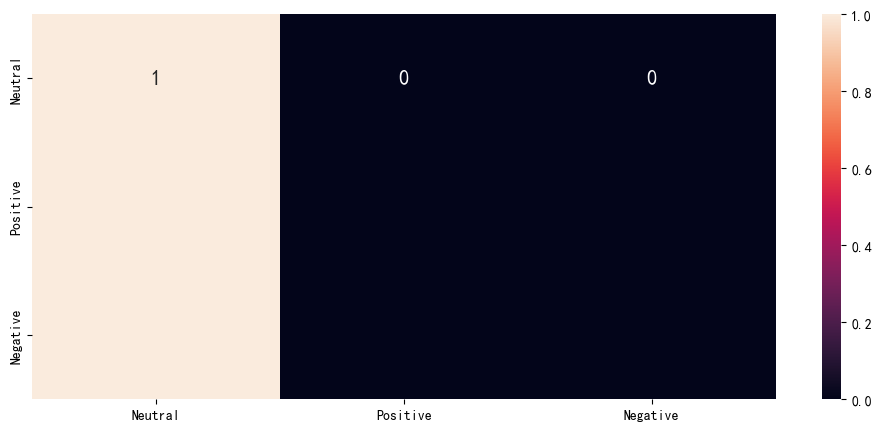

,Neutral,Positive,Negative
Neutral,1.0,0.0,0.0
Positive,1.0,0.0,0.0
Negative,1.0,0.0,0.0


In [82]:
# Use norm_matrix
conf_matrix = pd.DataFrame(norm_matrix, index=conf_matrix.index, columns=conf_matrix.columns) 
plt.figure(figsize = (12,5)) # figure size = 12x5 inch
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15, "weight": "bold"}) # annot(annotation): 顯示具體的數值。 annot_kws(annotation keywords): 設定標註文字的樣式
plt.show()
conf_matrix